## Preparación de datos para un análisis exploratorio de datos.

### Librerías requeridas:


In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
from shapely.geometry import Polygon
import unicodedata
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split




### Importación de datos:

In [71]:
atus = pd.read_csv("datasets/atus_valor_31.csv", encoding="utf-8")
vmrc = pd.read_csv("datasets/vmrc_valor_31.csv", encoding="utf-8")

### Exploración de los datasets

#### Accidentes de tráfico:

In [72]:
atus.head()

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,año,valor,unidad_medida
0,31,Yucatán,0,Estatal,1006000039,Accidentes de tránsito terrestre en zonas urba...,1997,4460,Accidentes
1,31,Yucatán,0,Estatal,1006000039,Accidentes de tránsito terrestre en zonas urba...,1998,3600,Accidentes
2,31,Yucatán,0,Estatal,1006000039,Accidentes de tránsito terrestre en zonas urba...,1999,4009,Accidentes
3,31,Yucatán,0,Estatal,1006000039,Accidentes de tránsito terrestre en zonas urba...,2000,3972,Accidentes
4,31,Yucatán,0,Estatal,1006000039,Accidentes de tránsito terrestre en zonas urba...,2001,4093,Accidentes


In [73]:
atus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cve_entidad     4802 non-null   int64 
 1   desc_entidad    4802 non-null   object
 2   cve_municipio   4802 non-null   int64 
 3   desc_municipio  4802 non-null   object
 4   id_indicador    4802 non-null   int64 
 5   indicador       4802 non-null   object
 6   año             4802 non-null   int64 
 7   valor           4802 non-null   int64 
 8   unidad_medida   4802 non-null   object
dtypes: int64(5), object(4)
memory usage: 337.8+ KB


In [74]:
atus.describe()

,cve_entidad,cve_municipio,id_indicador,año,valor
count,4802.0,4802.00000,4.802000e+03,4802.000000,4802.000000
mean,31.0,52.16868,3.758760e+09,2008.507913,112.400666
std,0.0,30.48816,2.592600e+09,7.602226,609.895879
min,31.0,0.00000,1.006000e+09,1997.000000,0.000000
25%,31.0,27.00000,1.006000e+09,2002.000000,0.000000
50%,31.0,52.00000,6.200009e+09,2008.000000,3.000000
75%,31.0,78.00000,6.200009e+09,2014.750000,22.000000
max,31.0,106.00000,6.200009e+09,2023.000000,8864.000000


In [75]:
atus.columns

Index(['cve_entidad', 'desc_entidad', 'cve_municipio', 'desc_municipio',
       'id_indicador', 'indicador', 'año', 'valor', 'unidad_medida'],
      dtype='object')

In [76]:
atus.isna()

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,año,valor,unidad_medida
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4797,False,False,False,False,False,False,False,False,False
4798,False,False,False,False,False,False,False,False,False
4799,False,False,False,False,False,False,False,False,False
4800,False,False,False,False,False,False,False,False,False


Notas: Aparentemente todo esta limpio, solo habría que evaluar si hay que normalizar columnas

####  Vehiculos con motor circulando:

In [77]:
vmrc.head()

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,año,valor,unidad_medida
0,31,Yucatán,0,Estatal,6207048973,Vehículos de motor registrados en circulación,1980,76404,No especificada
1,31,Yucatán,0,Estatal,6207048973,Vehículos de motor registrados en circulación,1981,79229,No especificada
2,31,Yucatán,0,Estatal,6207048973,Vehículos de motor registrados en circulación,1982,81378,No especificada
3,31,Yucatán,0,Estatal,6207048973,Vehículos de motor registrados en circulación,1983,83293,No especificada
4,31,Yucatán,0,Estatal,6207048973,Vehículos de motor registrados en circulación,1984,86616,No especificada


In [78]:
vmrc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3164 entries, 0 to 3163
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cve_entidad     3164 non-null   int64 
 1   desc_entidad    3164 non-null   object
 2   cve_municipio   3164 non-null   int64 
 3   desc_municipio  3164 non-null   object
 4   id_indicador    3164 non-null   int64 
 5   indicador       3164 non-null   object
 6   año             3164 non-null   int64 
 7   valor           3164 non-null   int64 
 8   unidad_medida   3164 non-null   object
dtypes: int64(5), object(4)
memory usage: 222.6+ KB


In [79]:
vmrc.describe()

,cve_entidad,cve_municipio,id_indicador,año,valor
count,3164.0,3164.000000,3.164000e+03,3164.000000,3.164000e+03
mean,31.0,58.665929,6.207049e+09,2008.151391,1.041047e+04
std,0.0,75.551319,0.000000e+00,9.652948,6.878704e+04
min,31.0,0.000000,6.207049e+09,1980.000000,4.000000e+00
25%,31.0,27.000000,6.207049e+09,2001.000000,1.960000e+02
50%,31.0,54.000000,6.207049e+09,2009.000000,4.610000e+02
75%,31.0,81.000000,6.207049e+09,2016.000000,1.117750e+03
max,31.0,997.000000,6.207049e+09,2023.000000,1.054187e+06


In [80]:
vmrc.isna()

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,año,valor,unidad_medida
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3159,False,False,False,False,False,False,False,False,False
3160,False,False,False,False,False,False,False,False,False
3161,False,False,False,False,False,False,False,False,False
3162,False,False,False,False,False,False,False,False,False


In [81]:
vmrc.columns

Index(['cve_entidad', 'desc_entidad', 'cve_municipio', 'desc_municipio',
       'id_indicador', 'indicador', 'año', 'valor', 'unidad_medida'],
      dtype='object')

Nota: Hay que evaluar si habrán columnas por normalizar, y tiene la misma estructura que el anterior dataset

### Preprocesamiento:

Acorde a mi evaluación, lo mejor es añadir una columna normalizada del campo `valor`, para facilitar ciertos análisis. El resto considero que esta bien.

Para normalizar la columna encontrada en ambos datasets, usaremos el Z-score, tal que nos quede $ \mu = 0 $ y $ sd = 1 $

In [82]:
scaler = StandardScaler()
atus['valor_norm'] = scaler.fit_transform(atus[['valor']])
vmrc['valor_norm'] = scaler.fit_transform(vmrc[['valor']])


In [83]:
atus

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,año,valor,unidad_medida,valor_norm
0,31,Yucatán,0,Estatal,1006000039,Accidentes de tránsito terrestre en zonas urba...,1997,4460,Accidentes,7.129171
1,31,Yucatán,0,Estatal,1006000039,Accidentes de tránsito terrestre en zonas urba...,1998,3600,Accidentes,5.718948
2,31,Yucatán,0,Estatal,1006000039,Accidentes de tránsito terrestre en zonas urba...,1999,4009,Accidentes,6.389624
3,31,Yucatán,0,Estatal,1006000039,Accidentes de tránsito terrestre en zonas urba...,2000,3972,Accidentes,6.328951
4,31,Yucatán,0,Estatal,1006000039,Accidentes de tránsito terrestre en zonas urba...,2001,4093,Accidentes,6.527366
...,...,...,...,...,...,...,...,...,...,...
4797,31,Yucatán,106,Yobaín,6200009439,Víctimas heridas en los accidentes de tránsito,2019,13,Víctimas,-0.162997
4798,31,Yucatán,106,Yobaín,6200009439,Víctimas heridas en los accidentes de tránsito,2020,3,Víctimas,-0.179395
4799,31,Yucatán,106,Yobaín,6200009439,Víctimas heridas en los accidentes de tránsito,2021,10,Víctimas,-0.167916
4800,31,Yucatán,106,Yobaín,6200009439,Víctimas heridas en los accidentes de tránsito,2022,12,Víctimas,-0.164636


In [84]:
vmrc

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,año,valor,unidad_medida,valor_norm
0,31,Yucatán,0,Estatal,6207048973,Vehículos de motor registrados en circulación,1980,76404,No especificada,0.959541
1,31,Yucatán,0,Estatal,6207048973,Vehículos de motor registrados en circulación,1981,79229,No especificada,1.000616
2,31,Yucatán,0,Estatal,6207048973,Vehículos de motor registrados en circulación,1982,81378,No especificada,1.031862
3,31,Yucatán,0,Estatal,6207048973,Vehículos de motor registrados en circulación,1983,83293,No especificada,1.059706
4,31,Yucatán,0,Estatal,6207048973,Vehículos de motor registrados en circulación,1984,86616,No especificada,1.108022
...,...,...,...,...,...,...,...,...,...,...
3159,31,Yucatán,997,Otros estados,6207048973,Vehículos de motor registrados en circulación,1992,7553,No especificada,-0.041547
3160,31,Yucatán,997,Otros estados,6207048973,Vehículos de motor registrados en circulación,1993,5766,No especificada,-0.067530
3161,31,Yucatán,997,Otros estados,6207048973,Vehículos de motor registrados en circulación,1994,8603,No especificada,-0.026280
3162,31,Yucatán,997,Otros estados,6207048973,Vehículos de motor registrados en circulación,1995,8529,No especificada,-0.027356


In [85]:
atus.columns

Index(['cve_entidad', 'desc_entidad', 'cve_municipio', 'desc_municipio',
       'id_indicador', 'indicador', 'año', 'valor', 'unidad_medida',
       'valor_norm'],
      dtype='object')

In [86]:
vmrc.columns

Index(['cve_entidad', 'desc_entidad', 'cve_municipio', 'desc_municipio',
       'id_indicador', 'indicador', 'año', 'valor', 'unidad_medida',
       'valor_norm'],
      dtype='object')

## Análisis Exploratorio de Datos:

In [87]:
# Intersección de años
años_comunes = sorted(set(atus['año']) & set(vmrc['año']))
print("Años comunes:", años_comunes)

# Intersección de municipios
municipios_comunes = sorted(set(atus['desc_municipio']) & set(vmrc['desc_municipio']))
print("Municipios comunes:", municipios_comunes)


Años comunes: [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Municipios comunes: ['Abalá', 'Acanceh', 'Akil', 'Baca', 'Bokobá', 'Buctzotz', 'Cacalchén', 'Calotmul', 'Cansahcab', 'Cantamayec', 'Celestún', 'Cenotillo', 'Chacsinkín', 'Chankom', 'Chapab', 'Chemax', 'Chichimilá', 'Chicxulub Pueblo', 'Chikindzonot', 'Chocholá', 'Chumayel', 'Conkal', 'Cuncunul', 'Cuzamá', 'Dzemul', 'Dzidzantún', 'Dzilam González', 'Dzilam de Bravo', 'Dzitás', 'Dzoncauich', 'Dzán', 'Espita', 'Estatal', 'Halachó', 'Hocabá', 'Hoctún', 'Homún', 'Huhí', 'Hunucmá', 'Ixil', 'Izamal', 'Kanasín', 'Kantunil', 'Kaua', 'Kinchil', 'Kopomá', 'Mama', 'Maní', 'Maxcanú', 'Mayapán', 'Mocochá', 'Motul', 'Muna', 'Muxupip', 'Mérida', 'Opichén', 'Oxkutzcab', 'Panabá', 'Peto', 'Progreso', 'Quintana Roo', 'Río Lagartos', 'Sacalum', 'Samahil', 'San Felipe', 'Sanahcat', 'Santa Elena', 'Seyé', 'Sinanché', 'Sotuta', 'Sucil

In [88]:
atus_ren = atus.rename(columns={'valor': 'accidentes', 'valor_norm': 'accidentes_norm'})
vmrc_ren = vmrc.rename(columns={'valor': 'vehiculos', 'valor_norm': 'vehiculos_norm'})

# Merge por municipio y año
df = pd.merge(
    atus_ren[['desc_municipio', 'año', 'accidentes', 'accidentes_norm']],
    vmrc_ren[['desc_municipio', 'año', 'vehiculos', 'vehiculos_norm']],
    on=['desc_municipio', 'año'],
    how='inner'
)

df['riesgo'] = df['accidentes'] / df['vehiculos']
df['riesgo_norm'] = df['accidentes_norm'] / df['vehiculos_norm']


In [89]:
df

,desc_municipio,año,accidentes,accidentes_norm,vehiculos,vehiculos_norm,riesgo,riesgo_norm
0,Estatal,1997,4460,7.129171,132085,1.769138,0.033766,4.029743
1,Estatal,1998,3600,5.718948,154417,2.093844,0.023313,2.731316
2,Estatal,1999,4009,6.389624,175384,2.398702,0.022858,2.663784
3,Estatal,2000,3972,6.328951,214190,2.962938,0.018544,2.136039
4,Estatal,2001,4093,6.527366,238881,3.321943,0.017134,1.964924
...,...,...,...,...,...,...,...,...
4787,Yobaín,2019,13,-0.162997,420,-0.145261,0.030952,1.122098
4788,Yobaín,2020,3,-0.179395,454,-0.144766,0.006608,1.239202
4789,Yobaín,2021,10,-0.167916,479,-0.144403,0.020877,1.162832
4790,Yobaín,2022,12,-0.164636,569,-0.143094,0.021090,1.150546


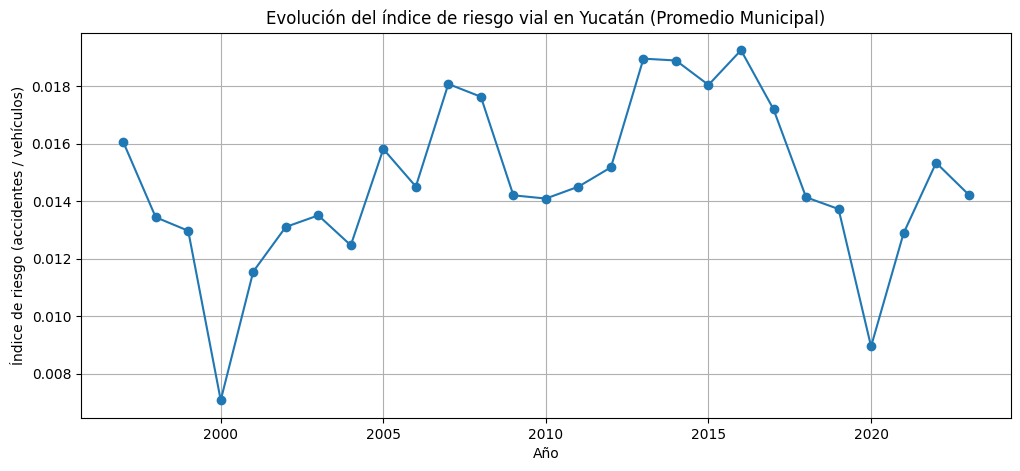

In [90]:
riesgo_anual = df.groupby('año')['riesgo'].mean().reset_index()


plt.figure(figsize=(12, 5))
plt.plot(riesgo_anual['año'], riesgo_anual['riesgo'], marker='o')
plt.title('Evolución del índice de riesgo vial en Yucatán (Promedio Municipal)')
plt.xlabel('Año')
plt.ylabel('Índice de riesgo (accidentes / vehículos)')
plt.grid(True)
plt.show()


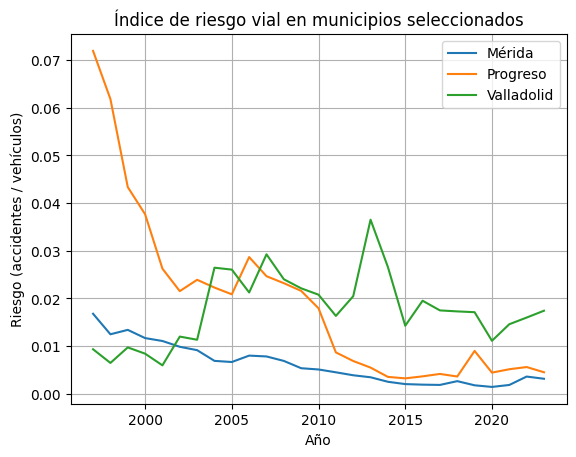

In [91]:
df_grouped = df.groupby(['desc_municipio', 'año']).agg({
    'accidentes': 'sum',
    'vehiculos': 'sum'
}).reset_index()

df_grouped['riesgo'] = df_grouped['accidentes'] / df_grouped['vehiculos']

municipios_seleccionados = ['Mérida', 'Progreso', 'Valladolid']

for municipio in municipios_seleccionados:
    datos_mpio = df_grouped[df_grouped['desc_municipio'] == municipio]
    plt.plot(datos_mpio['año'], datos_mpio['riesgo'], label=municipio)

plt.title('Índice de riesgo vial en municipios seleccionados')
plt.xlabel('Año')
plt.ylabel('Riesgo (accidentes / vehículos)')
plt.legend()
plt.grid(True)
plt.show()


In [92]:
inicio = df_grouped[df_grouped['año'] == 1997][['desc_municipio', 'riesgo']].rename(columns={'riesgo': 'riesgo_inicio'})
fin = df_grouped[df_grouped['año'] == 2023][['desc_municipio', 'riesgo']].rename(columns={'riesgo': 'riesgo_fin'})

cambio_riesgo = pd.merge(inicio, fin, on='desc_municipio')
cambio_riesgo['variacion'] = cambio_riesgo['riesgo_fin'] - cambio_riesgo['riesgo_inicio']


In [93]:
cambio_riesgo.sort_values(by='variacion').head(10)


,desc_municipio,riesgo_inicio,riesgo_fin,variacion
34,Progreso,0.071952,0.004470,-0.067482
6,Cenotillo,0.046512,0.016595,-0.029917
31,Oxkutzcab,0.035026,0.006219,-0.028806
3,Buctzotz,0.046639,0.019407,-0.027232
12,Cuzamá,0.030303,0.004539,-0.025764
53,Tzucacab,0.031250,0.010086,-0.021164
5,Cansahcab,0.030769,0.010302,-0.020467
40,Suma,0.030303,0.010022,-0.020281
51,Tixmehuac,0.041667,0.022312,-0.019354
20,Hunucmá,0.028842,0.009858,-0.018984


In [94]:
cambio_riesgo.sort_values(by='variacion', ascending=False).head(10)


,desc_municipio,riesgo_inicio,riesgo_fin,variacion
14,Dzilam González,0.000000,0.048802,0.048802
48,Teya,0.000000,0.047872,0.047872
39,Sucilá,0.000000,0.027237,0.027237
36,Samahil,0.000000,0.023196,0.023196
15,Espita,0.000000,0.022959,0.022959
18,Homún,0.013514,0.033462,0.019949
13,Dzidzantún,0.006014,0.024915,0.018901
37,Sinanché,0.004115,0.021934,0.017819
21,Ixil,0.000000,0.016547,0.016547
32,Panabá,0.000000,0.016227,0.016227


In [95]:
df_2023 = df_grouped[df_grouped['año'] == 2023].copy()

df_2023 = df_2023[df_2023['vehiculos'] > 0]

df_2023['riesgo'] = df_2023['accidentes'] / df_2023['vehiculos']

top_peligrosos = df_2023.sort_values(by='riesgo', ascending=False)

top_seguros = df_2023.sort_values(by='riesgo', ascending=True).head(10)


In [96]:
top_peligrosos

,desc_municipio,año,accidentes,vehiculos,riesgo
565,Dzilam González,2023,165,3381,0.048802
1887,Teya,2023,27,564,0.047872
1118,Muna,2023,169,4764,0.035474
763,Homún,2023,130,3885,0.033462
1517,Sucilá,2023,42,1542,0.027237
870,Izamal,2023,453,17835,0.025399
538,Dzidzantún,2023,132,5298,0.024915
1378,Samahil,2023,54,2328,0.023196
652,Espita,2023,106,4617,0.022959
1914,Ticul,2023,725,31737,0.022844


In [97]:
top_seguros

,desc_municipio,año,accidentes,vehiculos,riesgo
15,Abalá,2023,0,2048,0.000000
273,Chacsinkín,2023,0,768,0.000000
1578,Tahdziú,2023,0,562,0.000000
1160,Mérida,2023,4567,1470902,0.003105
329,Chemax,2023,13,3658,0.003554
413,Chocholá,2023,15,4074,0.003682
1186,Opichén,2023,7,1764,0.003968
978,Kopomá,2023,5,1215,0.004115
371,Chicxulub Pueblo,2023,15,3636,0.004125
679,Estatal,2023,14004,3162561,0.004428


In [98]:
df_acumulado = df_grouped.groupby('desc_municipio').agg({
    'accidentes': 'sum',
    'vehiculos': 'sum'
}).reset_index()

df_acumulado['riesgo_acumulado'] = df_acumulado['accidentes'] / df_acumulado['vehiculos']


In [108]:
gdf = gpd.read_file("datasets/31mun.shp")

gdf
# Une usando los nombres (asegúrate de estandarizar tildes o mayúsculas si hace falta)
#gdf = gdf.merge(df_acumulado, left_on='NOM_MUN', right_on='desc_municipio', how='left')


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,31068,31,068,Sinanché,"POLYGON ((3823932.568 1097338.499, 3823931.938..."
1,31066,31,066,Santa Elena,"POLYGON ((3786138.726 984980.799, 3786222.47 9..."
2,31029,31,029,Dzilam González,"POLYGON ((3882475.186 1111287.144, 3882728.094..."
3,31001,31,001,Abalá,"POLYGON ((3775601.224 1025200.436, 3776482.758..."
4,31003,31,003,Akil,"POLYGON ((3813878.094 982372.302, 3813898.891 ..."
...,...,...,...,...,...
101,31095,31,095,Tixpéhual,"POLYGON ((3793626.496 1056618.225, 3793659.837..."
102,31097,31,097,Tunkás,"POLYGON ((3873818.613 1066308.333, 3873859.147..."
103,31103,31,103,Xocchel,"POLYGON ((3836120.442 1042408.895, 3836150.928..."
104,31105,31,105,Yaxkukul,"POLYGON ((3798371.076 1065743.892, 3798473.771..."


In [113]:
gdf.columns

Index(['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'NOMGEO', 'geometry'], dtype='object')

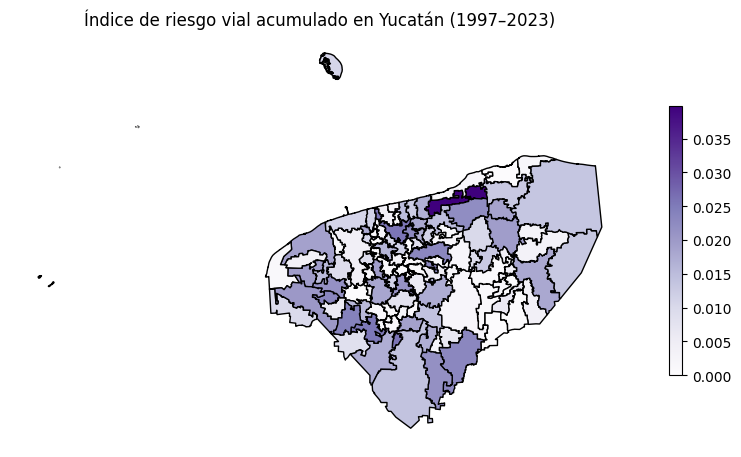

In [122]:
# Agrupar datos por municipio (todos los años)
df_acumulado = df_grouped.groupby('desc_municipio').agg({
    'accidentes': 'sum',
    'vehiculos': 'sum'
}).reset_index()

# Crear columna de riesgo acumulado
df_acumulado['riesgo_acumulado'] = df_acumulado['accidentes'] / df_acumulado['vehiculos']

# Función para quitar acentos
def quitar_acentos(texto):
    if isinstance(texto, str):
        texto = unicodedata.normalize('NFKD', texto)
        texto = texto.encode('ASCII', 'ignore').decode('utf-8')
        return texto.upper()
    else:
        return texto

# Normalizar los nombres del shapefile y de tu dataset
gdf['NOMGEO_norm'] = gdf['NOMGEO'].apply(quitar_acentos)
df_acumulado['desc_municipio_norm'] = df_acumulado['desc_municipio'].apply(quitar_acentos)

# Unir usando los nombres normalizados
gdf_final = gdf.merge(df_acumulado, left_on='NOMGEO_norm', right_on='desc_municipio_norm', how='left')

fig, ax = plt.subplots(figsize=(10, 10))
gdf_final.plot(column='riesgo_acumulado', cmap='Purples', 
               missing_kwds={"color": "lightgrey"}, edgecolor='black', legend=True, ax=ax,legend_kwds={'shrink': 0.35})

ax.set_title('Índice de riesgo vial acumulado en Yucatán (1997–2023)')
ax.axis('off')
plt.show()



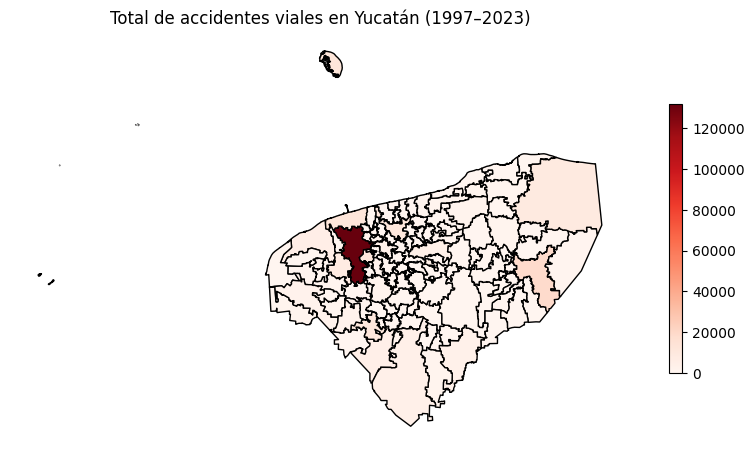

In [121]:

fig, ax = plt.subplots(figsize=(10, 10))
gdf_final.plot(column='accidentes', cmap='Reds', 
               missing_kwds={"color": "lightgrey"}, edgecolor='black', 
               legend=True, ax=ax,
               legend_kwds={'shrink': 0.35})  # Aquí hacemos la barra 50% del tamaño normal

ax.set_title('Total de accidentes viales en Yucatán (1997–2023)')
ax.axis('off')
plt.show()


Coeficiente de correlación (r): 0.8813
R^2 (coeficiente de determinación): 0.7767


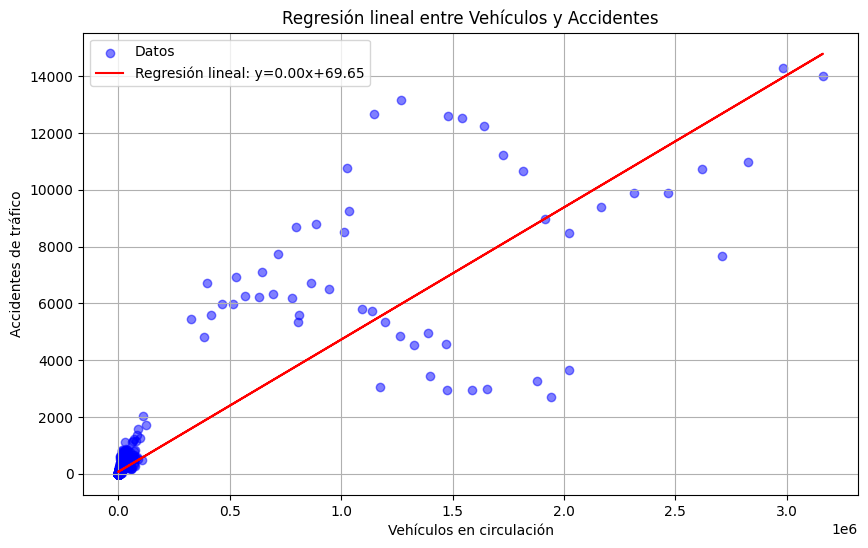

In [125]:

# Seleccionar columnas necesarias
x = df_grouped['vehiculos']
y = df_grouped['accidentes']

# Filtrar donde vehículos sea mayor a 0
mask = x > 0
x = x[mask]
y = y[mask]

# Aplicar regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Mostrar coeficiente de correlación
print(f"Coeficiente de correlación (r): {r_value:.4f}")
print(f"R^2 (coeficiente de determinación): {r_value**2:.4f}")

# Graficar puntos y recta de regresión
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5, label='Datos')
plt.plot(x, intercept + slope*x, 'r', label=f'Regresión lineal: y={slope:.2f}x+{intercept:.2f}')
plt.xlabel('Vehículos en circulación')
plt.ylabel('Accidentes de tráfico')
plt.title('Regresión lineal entre Vehículos y Accidentes')
plt.legend()
plt.grid(True)
plt.show()


In [127]:
# Preparar datos
x = df_grouped['vehiculos'].values.reshape(-1, 1)
y = df_grouped['accidentes'].values

# Filtrar donde vehículos > 0
mask = x.flatten() > 0
x = x[mask]
y = y[mask]

# Ajustar modelo
modelo = LinearRegression()
modelo.fit(x, y)

# Coeficientes
beta_0 = modelo.intercept_
beta_1 = modelo.coef_[0]

print(f"Intercepción (β0): {beta_0:.4f}")
print(f"Pendiente (β1): {beta_1:.8f}")

# Encontrar la mínima cantidad de vehículos para 1 accidente
vehiculos_minimos = (1 - beta_0) / beta_1
vehiculos_minimos = np.ceil(vehiculos_minimos)  # Redondear hacia arriba

print(f"\nMínimo número de vehículos necesarios para esperar al menos un accidente: {vehiculos_minimos:.0f} vehículos")


Intercepción (β0): 69.6505
Pendiente (β1): 0.00465553

Mínimo número de vehículos necesarios para esperar al menos un accidente: -14746 vehículos


In [128]:
# Ajustar modelo SIN intercepto
modelo_sin_intercepto = LinearRegression(fit_intercept=False)
modelo_sin_intercepto.fit(x, y)

# Ahora calcular vehículos mínimos
beta_1_sin = modelo_sin_intercepto.coef_[0]
vehiculos_minimos_sin = 1 / beta_1_sin
vehiculos_minimos_sin = np.ceil(vehiculos_minimos_sin)

print(f"Mínimo número de vehículos necesarios (modelo sin intercepto): {vehiculos_minimos_sin:.0f} vehículos")


Mínimo número de vehículos necesarios (modelo sin intercepto): 213 vehículos


In [130]:

# Predicciones
y_pred = modelo.predict(x)

# R2
r2 = r2_score(y, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# MAE
mae = mean_absolute_error(y, y_pred)

print(f"Precisión del modelo:")
print(f"R² (coeficiente de determinación): {r2:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f} accidentes")
print(f"MAE (Mean Absolute Error): {mae:.2f} accidentes")


Precisión del modelo:
R² (coeficiente de determinación): 0.7767
RMSE (Root Mean Squared Error): 585.63 accidentes
MAE (Mean Absolute Error): 153.64 accidentes


In [133]:
# Preparar datos
x = df_grouped['vehiculos'].values.reshape(-1, 1)
y = df_grouped['accidentes'].values

# Filtrar donde vehículos > 0
mask = x.flatten() > 0
x = x[mask]
y = y[mask]

# Dividir en train y test (80% - 20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Entrenar modelo en TRAIN
modelo = LinearRegression()
modelo.fit(x_train, y_train)

# Predecir en TEST
y_pred = modelo.predict(x_test)

# Métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Resultados en datos de prueba (test set):")
print(f"R² (coeficiente de determinación): {r2:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f} accidentes")
print(f"MAE (Mean Absolute Error): {mae:.2f} accidentes")

Resultados en datos de prueba (test set):
R² (coeficiente de determinación): 0.9535
RMSE (Root Mean Squared Error): 257.29 accidentes
MAE (Mean Absolute Error): 99.39 accidentes
